# ex2.0 jack's car rental

Goal:

- understanding how to construct an environment
- understanding of the joint probability functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
from scipy.stats import poisson

N_CARS = 20

# renting and returning propabilities
P_RETURN_A = poisson.pmf(np.arange(0, N_CARS + 1), 3)
P_RENT_A = poisson.pmf(np.arange(0, N_CARS + 1), 3)
P_RETURN_B = poisson.pmf(np.arange(0, N_CARS + 1), 2)
P_RENT_B = poisson.pmf(np.arange(0, N_CARS + 1), 4)

Poisson distribution of rent and return cars (at second location):

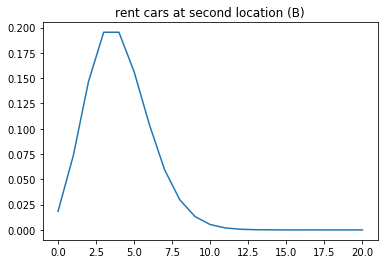

In [3]:
plt.title('rent cars at second location (B)')
plt.plot(P_RENT_B)

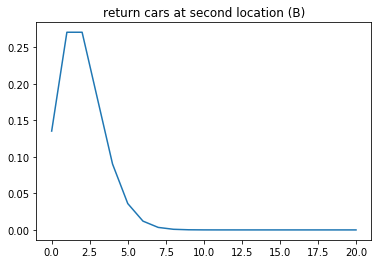

In [4]:
plt.title('return cars at second location (B)')
plt.plot(P_RETURN_B)

# Start! 

Implement useful functions for the environment of the Jack's car rental problem.

In [5]:
def step_rent(n_car, p):
    """return probability distribution over the number of cars after rent"""
    # code here ...
    pp = np.zeros(N_CARS + 1)
    r = 0.
    for i_rent in range(0, N_CARS + 1):
        _p = p[i_rent]
        i_rent = min(n_car, i_rent)
        r += _p * 10. * i_rent
        pp[n_car - i_rent] += _p
    return pp, r


def step_return(p_car, p):
    """return a distribution over the number of cars aftern returned"""
    # code here ...
    pp = np.zeros(N_CARS + 1)
    for n_car in range(0, N_CARS + 1):
        for i_ret in range(0, N_CARS + 1):
            nn_car = min(n_car + i_ret, N_CARS)
            pp[nn_car] += p_car[n_car] * p[i_ret]
    return pp


def step_rent_return(n_car, p_rent, p_return):
    # each location is independent
    p, r = step_rent(n_car, p_rent)
    p = step_return(p, p_return)
    return p, r

## verify rent

reward: 29.99615904998224


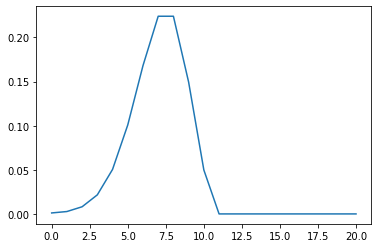

In [6]:
p, r = step_rent(10, P_RENT_A)
print('reward:', r)
plt.plot(p)

Expected result:

reward: 29.99615904998224

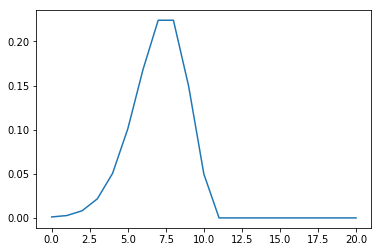

## verify return

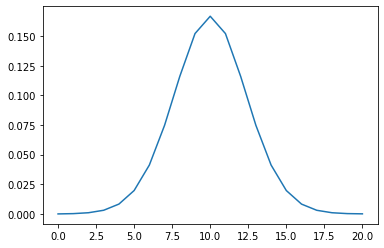

In [7]:
p, r = step_rent(10, P_RENT_A)
p = step_return(p, P_RETURN_A)
plt.plot(p)

Expected result:

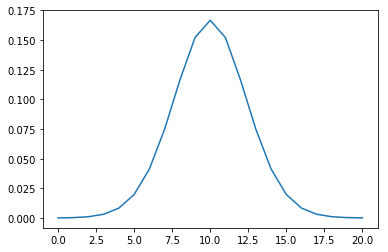

# The environment

Now implement the `step_env(s, a)` to be the environment. This function accepts a state (n_cars in A, n_cars in B) then returns the probability distribution over next state in terms of P(n_cars in A, n_cars in B) with an expected reward.

Hint: use the previous functions.

In [8]:
def step_env(s, a):
    """step a on state s, returning the next state distribution and the expected reward"""
    # move cars
    # code here ...
    n_a, n_b = s
    n_a -= a
    n_b += a
    r_move = -2 * abs(a)
    # renting and returning
    # code here ...
    p_a, r_a = step_rent_return(n_a, P_RENT_A, P_RETURN_A)
    p_b, r_b = step_rent_return(n_b, P_RENT_B, P_RETURN_B)
    p = np.outer(p_a, p_b)
    r = r_move + r_a + r_b
    return p, r

## verify the environment

reward: 66.0307882387861


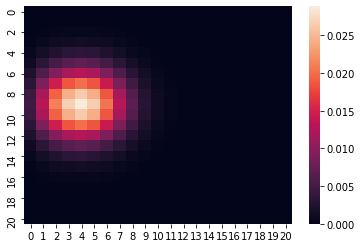

In [9]:
s = (10, 5)
p, r = step_env(s, 1)
print('reward:', r)
sns.heatmap(p)

Expected result:

reward: 66.0307882387861

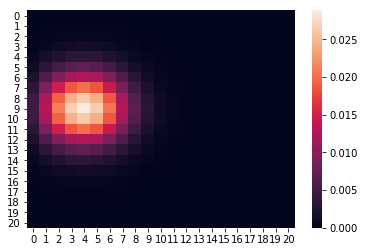